# Planck's law

In [8]:
# Load packages
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import sys
print(sys.executable)   # which environment is used
#!jupyter --version

C:\Users\beck\miniforge3\envs\ThermGeb24\python.exe


The content for the current page can be downloaded here {download}`Planck <./Planck_240315.ipynb>`.

To use the notebook press the rocket button!

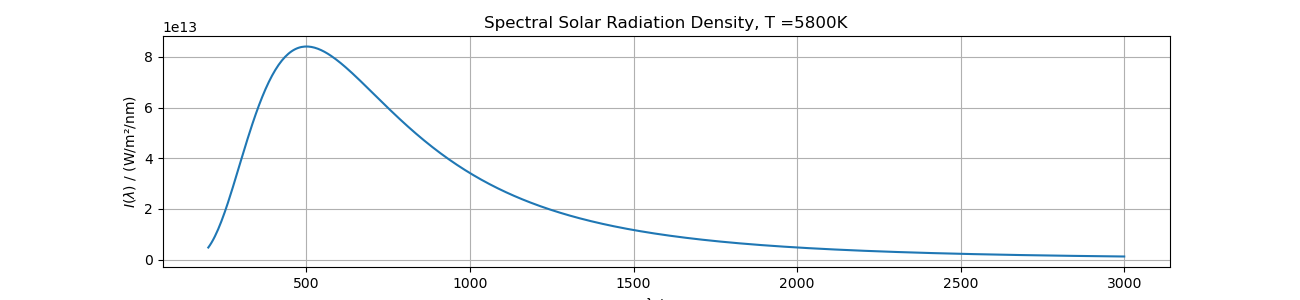

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def Planck(lam, T): # Function for Planck law
    # All quantities in SI units: W, s, m, K
    h = 6.626e-34        # Plancksches Wirkungsquantum
    c = 3e8              # Velocity of light
    k = 1.38e-23         # Boltzmann-Konstante

    c1  = 2*np.pi*c**2*h
    c2  = c*h/k

    I_lam = c1 / (lam**5 * (np.exp(c2 / (lam*T)) - 1))      # spectral radiation flux density 
    return I_lam

min_L =  200e-9
max_L = 3000e-9
dL    =    5e-9
NL    = int((max_L - min_L) / dL + 1)
lam   = np.linspace(min_L, max_L, NL)
T     = 5800
I     = Planck(lam=lam, T=T)

fig = plt.figure(figsize=(13, 3))
title = 'Spectral Solar Radiation Density, T =' + str(T) + 'K'
plt.title(title)
plt.xlabel('$\lambda$ / nm')
plt.ylabel('$I(\lambda)$ / (W/m²/nm)')
plt.plot(lam * 1e9, I)
plt.grid()
plt.show()

In [4]:
## Wavelength of the maximum, power density
r_S  = 1.393 * 1e6 / 2  # radius of the sun
r_SE = 149597870        # mean distance sun - earth
print('Lambda_max =', round(lam[np.argmax(Planck(lam, T))]*1e9), 'nm')
print('Solar constant =', round(sum(Planck(lam, T)) * (lam[1] - lam[0]) * (r_S / r_SE)**2), 'W/m²')

Lambda_max = 500 nm
Solar constant = 1355 W/m²


## Sensivity curve of the human eye - brightly adapted

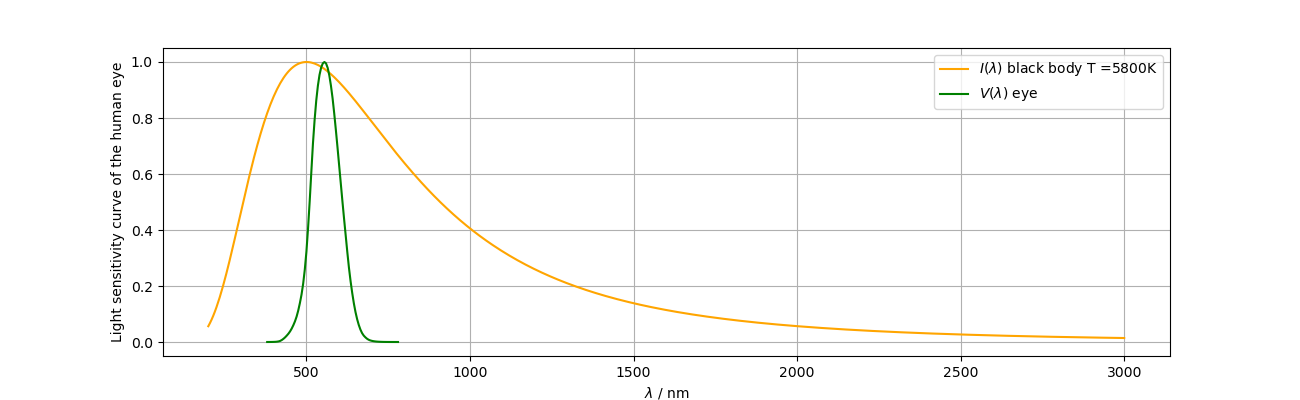

In [5]:
# Due to old DIN related to 555 nm (maximum)
V = np.array([0.039, 0.064, 0.12, 0.217, 0.396, 0.64, 1.21, 2.18, 4.0, 7.3, 11.6,
            16.84, 23, 29.8, 38, 48, 60, 73.9, 90.9, 112.6, 139, 169.3,
            208, 258.6, 323, 407.3, 503, 608, 710, 793, 862, 915, 954,
            980, 995, 1000, 995, 979, 952, 915, 870, 816, 757, 695, 631, 
            567, 503, 441, 381, 321, 265, 217, 175, 138, 107, 81.6, 61,
            44.6, 32, 23.2, 17, 11.9, 8.21, 5.72, 4.10, 2.93, 2.09, 1.48, 1.05,
            0.74, 0.52, 0.36, 0.249, 0.172, 0.12, 0.0848, 0.06, 0.042, 0.03,
            0.021, 0.015]) * 1e-3
N = len(V)
lam_e = np.linspace(380, 780, N) * 1e-9

fig = plt.figure(figsize=(13, 4))
label = '$I(\lambda)$ black body T =' + str(T) + 'K'
plt.plot(lam * 1e9, I / np.max(I), color='orange', label=label)
plt.plot(lam_e * 1e9, V, 'g-', label='$V(\lambda)$ eye')
plt.xlabel('$\lambda$ / nm')
plt.ylabel('Light sensitivity curve of the human eye')
plt.legend()
plt.grid()

## Light Efficiency

Definition

$$
  \eta = \frac{\int_0^\infty V(\lambda) \, I(\lambda) \, d\lambda}{\int_0^\infty I(\lambda) \, d\lambda}
$$

In [6]:
# we first create two interpolation functions for V and I, respectively
fint_I   = interpolate.interp1d(lam, I, kind='linear')
fint_V   = interpolate.interp1d(lam_e, V, kind='linear', fill_value='extrapolate')
eta = sum(fint_V(lam) * fint_I(lam)) / sum(fint_I(lam))
print('Efficiency =', round(eta * 100), '%')

Efficiency = 14 %


```{admonition} Questions
:class: full-width
 
- How do the atmosphere changes the solar spectrum? Read for instance [Rayleigh](http://hyperphysics.phy-astr.gsu.edu/hbase/atmos/blusky.html)

- What is the characteristic law for Rayleigh scattering?

- How should we incorporate this into the above equations?

- Where is the radiation maximum of a tungsten lamp which operates at $T$ = 2800 K?

- What is the efficiency of this lamp?

```

### Now we want to determine the energy with parts of the solar spectrum

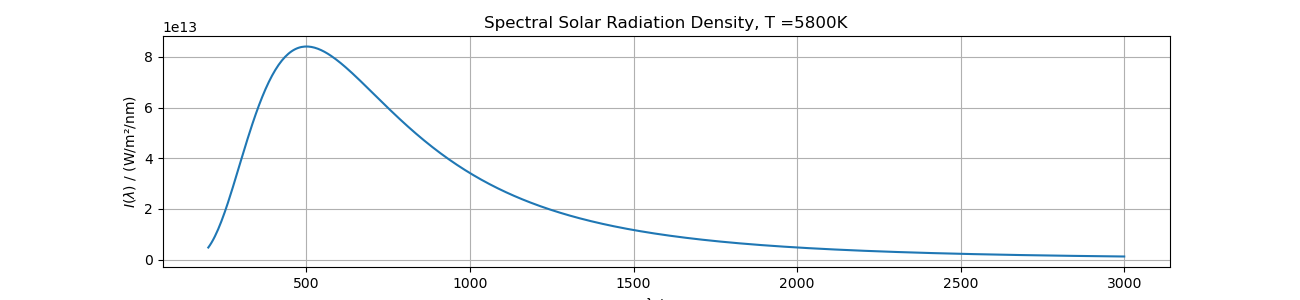

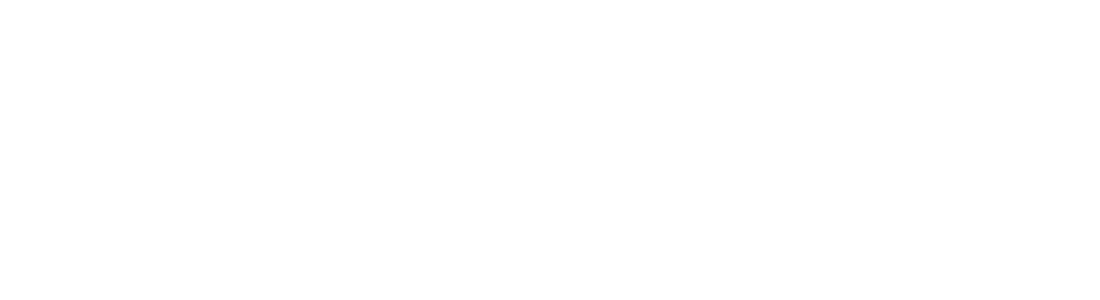

In [7]:
fig = plt.figure(figsize=(11, 3))

min_L =  200e-9
max_L = 3000e-9
dL    =    5e-9
NL    = int((max_L - min_L) / dL + 1)
lam   = np.linspace(min_L, max_L, NL)
T     = 5800
I     = Planck(lam=lam, T=T)

fig = plt.figure(figsize=(13, 3))
title = 'Spectral Solar Radiation Density, T =' + str(T) + 'K'
plt.title(title)
plt.xlabel('$\lambda$ / nm')
plt.ylabel('$I(\lambda)$ / (W/m²/nm)')
plt.plot(lam * 1e9, I)
plt.grid()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.widgets import RangeSlider

# generate a fake image
np.random.seed(19680801)
N = 128
img = np.random.randn(N, N)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig.subplots_adjust(bottom=0.25)

im = axs[0].imshow(img)
axs[1].hist(img.flatten(), bins='auto')
axs[1].set_title('Histogram of pixel intensities')

# Create the RangeSlider
slider_ax = fig.add_axes([0.20, 0.1, 0.60, 0.03])
slider = RangeSlider(slider_ax, "Threshold", img.min(), img.max())

# Create the Vertical lines on the histogram
lower_limit_line = axs[1].axvline(slider.val[0], color='k')
upper_limit_line = axs[1].axvline(slider.val[1], color='k')


def update(val):
    # The val passed to a callback by the RangeSlider will
    # be a tuple of (min, max)

    # Update the image's colormap
    im.norm.vmin = val[0]
    im.norm.vmax = val[1]

    # Update the position of the vertical lines
    lower_limit_line.set_xdata([val[0], val[0]])
    upper_limit_line.set_xdata([val[1], val[1]])

    # Redraw the figure to ensure it updates
    fig.canvas.draw_idle()


slider.on_changed(update)
plt.show()

In [41]:
%matplotlib ipympl
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

lam = np.linspace(100, 30000, 300) * 1e-9
T = 5800

fig = plt.figure(figsize=(7, 3))
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(lam, Planck(lam=lam, T=T))
ax.set_ylim(1e6, 1e14)
ax.set_xlim(100e-9, 30000e-9)
ax.set_yscale('log')
ax.grid()
#ax.set_xscale('log')

def update(T = 5800):
    line.set_ydata(Planck(lam, T))
    fig.canvas.draw_idle()
    plt.show()
    
interact(update, T = (300, 6000, 1e2));

interactive(children=(FloatSlider(value=5800.0, description='T', max=6000.0, min=300.0, step=100.0), Output())…

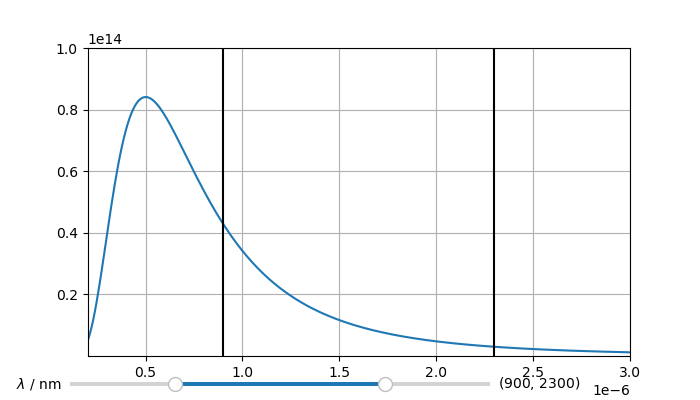

In [64]:
%matplotlib ipympl
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import RangeSlider

lam = np.linspace(200, 3000, 300) * 1e-9
T = 5800

val = np.array([400e-9, 700e-9])

fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(lam, Planck(lam=lam, T=T))
ax.set_ylim(1e6, 1e14)
ax.set_xlim(200e-9, 3000e-9)
#ax.set_yscale('log')
ax.grid()
#ax.set_xscale('log')

# Create the RangeSlider
slider_ax = fig.add_axes([0.1, 0.03, 0.6, 0.02])
slider = RangeSlider(slider_ax, "$\lambda$ / nm", 200, 3000)

# Create the Vertical lines on the histogram
lower_limit_line = ax.axvline(slider.val[0]*1e-9, color='k')
upper_limit_line = ax.axvline(slider.val[1]*1e-9, color='k')

def update(val):
    lower_limit_line.set_xdata([val[0]*1e-9, val[0]*1e-9])
    upper_limit_line.set_xdata([val[1]*1e-9, val[1]*1e-9])
    fig.canvas.draw_idle()
    #plt.show()
    
#interact(update);
slider.on_changed(update)
plt.show()

In [35]:
import pandas

df_sol = pandas.read_excel('SolarNorm.xlsx')#, sheet_name='Employees')

In [36]:
df_sol.head(3)

,lam,sdlam
0,300,0.0005
1,320,0.0069
2,340,0.0122


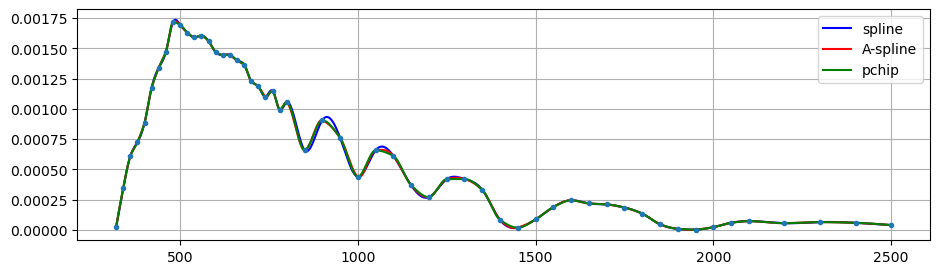

In [37]:
from scipy import interpolate
from scipy.interpolate import CubicSpline, PchipInterpolator, Akima1DInterpolator



fig = plt.figure(figsize=(11, 3))
sol = df_sol['sdlam'].values[0:-1] / abs((df_sol['lam'].values[0:-1] - df_sol['lam'].values[1:]))
x   = df_sol['lam'].values[1:]
xx  = np.linspace(min(x), max(x), 1000)
plt.plot(xx, CubicSpline(x, sol)(xx), 'b-', label='spline')
plt.plot(xx, Akima1DInterpolator(x, sol)(xx), 'r-', label='A-spline')
plt.plot(xx, PchipInterpolator(x, sol)(xx), 'g-', label='pchip')
plt.legend()

plt.plot(df_sol['lam'].values[1:], sol, '.') #df_sol['sdlam'], '.')
plt.grid()
plt.show()

In [38]:
df_astm = pandas.read_excel('astmg173.xlsx', sheet_name='SMARTS2')

In [39]:
df_astm.head(3)

,Lambda,E,Globaltilt,DirectandCirc
0,280.0,0.082,4.730900e-23,2.536100e-26
1,280.5,0.099,1.230700e-21,1.091700e-24
2,281.0,0.150,5.689500e-21,6.125300e-24


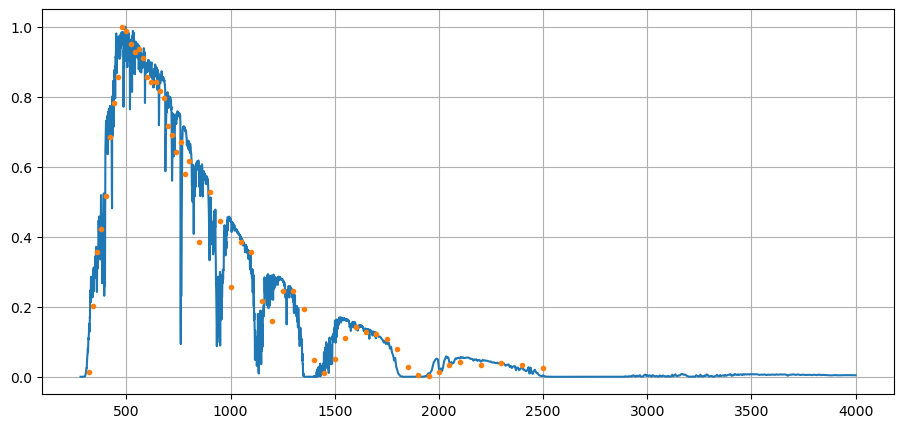

In [41]:
fig = plt.figure(figsize=(11, 5))
sol2 = df_astm['Globaltilt']
l   = df_astm['Lambda']
xx  = np.linspace(min(l), max(l), 1000)
#plt.plot(xx, CubicSpline(l, sol)(xx), 'b-', label='spline')
#plt.plot(xx, Akima1DInterpolator(l, sol)(xx), 'r-', label='A-spline')
#plt.plot(xx, PchipInterpolator(l, sol)(xx), 'g-', label='pchip')
#plt.legend()

plt.plot(l, sol2 / max(sol2), '-')
plt.plot(df_sol['lam'].values[1:], sol / max(sol), '.') 
plt.grid()
plt.show()